In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


CNN(Convolutional Neural Network) - 합성곱 신경망

In [3]:
# MNIST 데이터를 내려받아 학습 데이터 및 테스트 데이터로 분리해서 저장한다.
# MNIST 데이터는 28 * 28의 픽셀 데이터이고 각 픽셀은 0부터 255까지의 그레이스케일을 가지고 있다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# 6만 개의 학습 데이터 중 1만 개의 학습 데이터를 검증 데이터로 저장한다.
# 학습 중간마다 검증 데이터로 모델의 성능을 측정하면 모델 학습이 제대로 진행되는지 검증 정확도로 확인을 할 수 있고 학습 
# 정확도는 증가하는데 검증 정확도가 증가하지 않거나 떨어질 때 조기 종료를 구현할 수 있다.
x_val = x_train[50000:]   # 학습에 사용할 6만개의 데이터 중 검증 데이터 1만개
x_train = x_train[:50000] # 학습에 사용할 6만개의 데이터 중 학습 데이터 5만개
y_val = y_train[50000:]   # 학습에 사용할 6만개의 데이터 중 검증 데이터의 레이블 1만개
y_train = y_train[:50000] # 학습에 사용할 6만개의 데이터 중 검증 데이터의 레이블 5만개
# x_train.shape

In [5]:
print('학습 데이터 => {}개'.format(x_train.shape[0]))
print('학습 데이터는 {} * {} 픽셀의 이미지'.format(x_train.shape[1], x_train.shape[2]))
print('검증 데이터 => {}개'.format(x_val.shape[0]))
print('검증 데이터는 {} * {} 픽셀의 이미지'.format(x_val.shape[1], x_val.shape[2]))
print('=' * 80)
print('x_train.shape: {}'.format(x_train.shape)) # 학습 데이터는 5만 개 이고 28 * 28 픽셀의 이미지이다.
print('x_val.shape: {}'.format(x_val.shape))     # 검증 데이터는 1만 개 이고 28 * 28 픽셀의 이미지이다.
print('x_test.shape: {}'.format(x_test.shape))   # 테스트 데이터는 1만 개 이고 28 * 28 픽셀의 이미지이다.
print('y_train.shape: {}'.format(y_train.shape)) # 학습 데이터 5만 개의 실제값(레이블, 클래스, 타겟)
print('y_val.shape: {}'.format(y_val.shape))     # 검증 데이터 1만 개의 실제값
print('y_test.shape: {}'.format(y_test.shape))   # 테스트 데이터 1만 개의 실제값

학습 데이터 => 50000개
학습 데이터는 28 * 28 픽셀의 이미지
검증 데이터 => 10000개
검증 데이터는 28 * 28 픽셀의 이미지
x_train.shape: (50000, 28, 28)
x_val.shape: (10000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (50000,)
y_val.shape: (10000,)
y_test.shape: (10000,)


In [6]:
print(y_train[:10])
for i in x_train[4]:
    for j in i:
        print('%3d ' % j, end='')
    print()

[5 0 4 1 9 2 1 3 1 4]
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 25

데이터 구조를 변경한다.

In [7]:
# 28 * 28 픽셀의 단색 이미지이므로 데이터 형태를 28 * 28 * 1로 맞춰 CNN 모델에 입력하기 위해 데이터셋을 생성한다.
import numpy as np
x_train = np.reshape(x_train, (50000, 28, 28, 1))
print('x_train.shape: {}'.format(x_train.shape))
x_val = np.reshape(x_val, (10000, 28, 28, 1))
print('x_val.shape: {}'.format(x_val.shape))
x_test = np.reshape(x_test, (10000, 28, 28, 1))
print('x_test.shape: {}'.format(x_test.shape))

x_train.shape: (50000, 28, 28, 1)
x_val.shape: (10000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)


데이터 정규화

In [8]:
# 데이터 정규화는 학습 시간을 단축하고, 더 나은 성능을 발휘하도록 도와준다.
# MNIST 데이터의 모든 값은 0부터 255의 범위 안에 있으므로 255로 나눠줌으로써 모든 값을 0부터 1 사이의 값으로 정규화 한다.
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale

one hot encoding

In [9]:
# 손실 함수에서 크로스 엔트로피를 계산하기 위해, 실제값을 one hot encoding 값으로 변경한다.
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

텐스플로우로 CNN 구현하기

In [10]:
# MNIST 데이터 형태 그대로 28 * 28의 포맷을 입력 데이터로 사용하고 은 0부터 9까지의 숫자이다.
x = tf.placeholder(tf.float32, shape=[None, 28, 28, 1]) # 데이터
y = tf.placeholder(tf.float32, shape=[None, 10])        # 실제값(레이블, 클래스, 타겟)

In [11]:
# 파라미터 weight, bias의 초기값을 설정한다.
# CNN 모델을 구성하기 위해 많은 수의 가중치와 편향을 사용하게 되는데 대칭성을 깨뜨리고 기울기가 0이 되는 것을 방지하기 위해
# 가중치에 약간의 잡음을 주어 초기화 한다.

# tf.truncated_normal() 메소드는 0에서 거리가 먼 값이 설정되지 않도록 도와준다.
# 거리가 먼 값을 제외하는 이유는 소프트맥스 안에있는 시그모이드 함수의 특성 때문이다.
# 시그모이드는 입력값이 매우 크거나 작으면 그 미분값이 0가 가까워져서 경사하강법으로 파라미터를 변경시키기 어려워진다.

# weight를 만들어서 리턴하는 함수
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# bias를 만들어서 리턴하는 함수
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [12]:
# https://bcho.tistory.com/tag/stride 참조
# tf.nn.conv2d(필터를 적용할 이미지 데이터, 필터, strides, padding): 이미지 데이터에 필터를 적용한다.
# stride: 필터를 움직이는 간격으로 맨 앞과 맨 뒤는 통상적으로 1을 쓰고 2번째는 가로 스트라이드 값, 3번째는 세로 스트라이드 
# 값이 된다.
# padding: 입력 데이터 행렬 주위를 무의미한 값으로 감싸 필터를 거치고 나온 피처 맵의 크기가 작아지는 것을 방지하고 과대적합이
# 발생하는 것을 방지할 수 있다.
#     => 'SAME'은 텐서플로우가 자동으로 패딩을 삽입해 입력값과 출력값의 크기가 같게한다.
#     => 'VALID'는 텐서플로우가 자동으로 패딩을 적용하지 않고 필터를 적용해서 출력값의 크기가 작아진다.

def conv2d(x, W_conv):
    return tf.nn.conv2d(x, W_conv, strides=[1, 1, 1, 1], padding='SAME')

# tf.nn.max_pool(활성화 함수로 ReLu를 적용하고 맥스 풀링을 적용할 데이터, ksize, strides, padding): 맥스 풀링을 적용한다.
# ksize: 맥스 풀링 필터의 사이즈로 [1, 2, 2, 1]는 2 * 2 크기로 묶어서 풀링을 한다는 의미이다.
# strides, padding는 tf.nn.conv2d()의 strides, padding와 의미가 같다.

def max_pool_2x2(h_conv):
    return tf.nn.max_pool(h_conv, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')

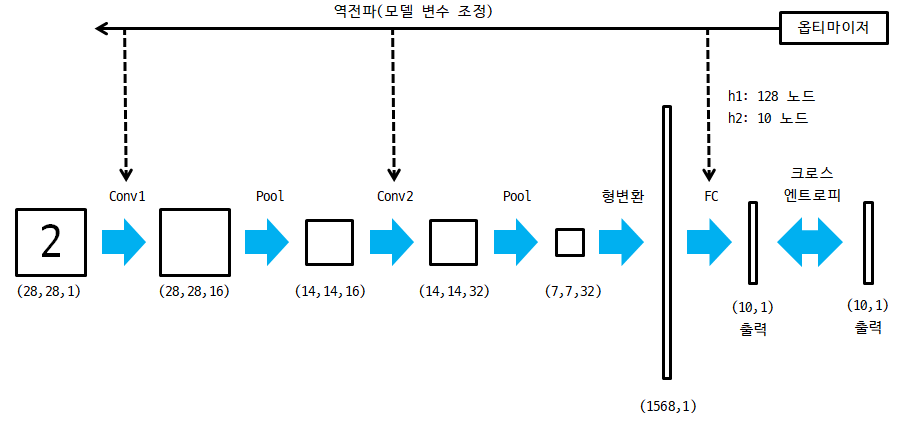

In [13]:
from IPython.display import Image
Image('cnn.png', width='1000')

In [14]:
# 첫 번째 컨볼루션 레이어는 총 16개의 필터를 가지고 있고 필터의 사이즈는 5 * 5이고 편항값(bias)은 필터의 개수만큼 만든다.
W_conv1 = weight_variable([5, 5, 1, 16]) # 첫 번째 컨볼루션 레이어 필터 정의
b_conv1 = bias_variable([16])            # 첫 번째 바이어스

# 활성화 함수로 ReLu를 사용한다.
h_conv1 = tf.nn.relu(conv2d(x, W_conv1) + b_conv1)

# 첫 번째 컨볼루션 레이어 다음으로 풀링 레이어를 적용하여 액티베이션 맵의 크기를 줄여준다.
# 액티베이션 맵의 크기를 줄여줌으로써 파라미터가 줄어들어 모델의 크기가 작아지고, 과대적합의 위험도 감소시켜 준다.
h_pool1 = max_pool_2x2(h_conv1)
# 풀링 레이어에 의해 액티베이션 맵의 사이즈는 14 * 14가 되었고 이 값은 다음에 이어지는 두 번째 컨볼루션 레이어의 입력으로
# 들아가게 된다.

In [15]:
# 두 번째 컨볼루션 레이어는 총 32개의 필터를 가진다.
W_conv2 = weight_variable([5, 5, 16, 32])
b_conv2 = bias_variable([32])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
# 풀링 레이어에 의해 액티베이션 맵의 사이즈는 7 * 7이 된다.

FC(Fully Connected Layer)

In [16]:
# FC는 컨볼루션 레이어를 통해 추출된 이미지의 특징들을 입력받아 0부터 9까지의 숫자 중 하나로 이미지를 분류한다.
W_fc1 = weight_variable([7 * 7 * 32, 128])
b_fc1 = bias_variable([128])

# 두 번째 컨볼루션 레이어의 맥스 풀링 결과를 행과 열을 변경해서 가중치와 행렬의 곱을 이용해 계산하고 활성화 함수로 ReLu를
# 사용한다.
# reshape은 원하는 shape를 직접 입력해서 바꿀 수 있다. shape에 -1을 입력하면 고정된 차원은 우선 채우고 남는 부분을 알아서
# 채워준다.
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 32])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# FC 영역에는 FC1, FC2 총 2개의 히든 레이어가 존재하고 FC1은 128개의 노드, FC2에는 10개의 노드가 존재한다.
# FC2에 10개의 노드가 존재하는 이유는 FC2의 10개의 노드의 값들을 소프트맥스에 입력시켜서 각 노드별 확률을 구하기 위해서이다.
# 각 노드는 숫자 0부터 9를 의미하며, 이 예측값은 크로스 엔트로피를 통해 실제값과의 차이를 계산하는데 사용된다.
W_fc2 = weight_variable([128, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2

비용 함수 정의

In [17]:
# 모델 정의가 끝났으므로 모델을 학습시키기 위해서 비용 함수를 정의한다. 비용 함수는 크로스 엔트로피를 이용한다.
# 실제값과 예측값의 크로스 엔트로피를 설정한다.
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_conv))
# 학습율을 0.001로 설정하여 Adam 옵티마이저를 사용해 모델을 최적화한다.
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

# 정확도를 계산한다.
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

학습 및 테스트

In [18]:
# CNN 모델을 MNIST 데이터로 학습한다. 3번의 주기만으로 놀라운 정확도가 확인된다.
# 미니 배치를 사용하여 모델을 최적화한다. 미니 배치는 총 500개의 학습 데이터가 들어있고, 미니 배치마다 파라미터를 조정한다.

# 초기화
init = tf.global_variables_initializer()

# 하이퍼파라미터 세팅
epoch_cnt = 3
batch_size = 500
iteration = len(x_train) // batch_size

# 학습 시작
with tf.Session() as sess:
    tf.set_random_seed(35)
    sess.run(init)
    
    for epoch in range(epoch_cnt):
        avg_loss = 0.0
        start = 0
        end = batch_size
        
        for i in range(iteration):
            if i % 10 == 0:
                train_acc = accuracy.eval(feed_dict={x: x_train[start:end], y: y_train[start:end]})
                print('step: {0:3d}, 학습 정확도: {1:7.3f}'.format(i, train_acc))
            # Adam 옵티마이저를 사용한 최적화 함수를 실행한다.
            train_step.run(feed_dict={x: x_train[start:end], y: y_train[start:end]})
            start += batch_size
            end += batch_size
        # =====
        
        # 검증 데이터로 모델을 검증한다.
        val_accuracy = accuracy.eval(feed_dict={x: x_val, y: y_val})
        print('검증 정확도 : {0:7.3f}'.format(val_accuracy))
    # =====
    
    # 모델을 테스트 한 정확도를 계산해 출력한다.
    test_accuracy = accuracy.eval(feed_dict={x: x_test, y: y_test})
    print('테스트 정확도 : {0:7.3f}'.format(test_accuracy))

InvalidArgumentError: Incompatible shapes: [8000] vs. [500]
	 [[node Equal (defined at <ipython-input-17-75680f6631cb>:8) ]]

Original stack trace for 'Equal':
  File "c:\python\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\python\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\python\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\python\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "c:\python\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "c:\python\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "c:\python\lib\asyncio\windows_events.py", line 316, in run_forever
    super().run_forever()
  File "c:\python\lib\asyncio\base_events.py", line 596, in run_forever
    self._run_once()
  File "c:\python\lib\asyncio\base_events.py", line 1890, in _run_once
    handle._run()
  File "c:\python\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\python\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\python\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "c:\python\lib\site-packages\tornado\gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "c:\python\lib\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "c:\python\lib\site-packages\ipykernel\kernelbase.py", line 374, in dispatch_queue
    yield self.process_one()
  File "c:\python\lib\site-packages\tornado\gen.py", line 250, in wrapper
    runner = Runner(ctx_run, result, future, yielded)
  File "c:\python\lib\site-packages\tornado\gen.py", line 741, in __init__
    self.ctx_run(self.run)
  File "c:\python\lib\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "c:\python\lib\site-packages\ipykernel\kernelbase.py", line 358, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\python\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "c:\python\lib\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\python\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "c:\python\lib\site-packages\ipykernel\kernelbase.py", line 536, in execute_request
    self.do_execute(
  File "c:\python\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "c:\python\lib\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\python\lib\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\python\lib\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
    result = self._run_cell(
  File "c:\python\lib\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
    return runner(coro)
  File "c:\python\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "c:\python\lib\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "c:\python\lib\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\python\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-75680f6631cb>", line 8, in <module>
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\math_ops.py", line 1729, in equal
    return gen_math_ops.equal(x, y, name=name)
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\ops\gen_math_ops.py", line 3227, in equal
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\ops.py", line 3557, in _create_op_internal
    ret = Operation(
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\ops.py", line 2045, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)
